## "Normal Distribution of Errors" assumption means. 

This implies that the errors (residuals) resulting from a statistical model or measurement process should follow a normal (Gaussian) distribution. This assumption is crucial for various statistical methods, such as linear regression.

### Steps to follow

##### Fit a Statistical Model:

Fit the appropriate statistical model to the dataset. For example,  fit a linear regression model to the data.
    
##### Compute Residuals:

Calculate the residuals by subtracting the observed values from the predicted values obtained from the model. Residuals represent the errors of the model, and their distribution is what we're interested in.

##### Visual Inspection:

Plot a histogram of the residuals to visually inspect their distribution. The histogram should provide an initial indication of whether the residuals approximately follow a normal distribution. 

##### Quantile-Quantile (Q-Q) Plot:

Create a Q-Q plot (Quantile-Quantile plot) of the residuals against a theoretical normal distribution. In a Q-Q plot, if the residuals follow a normal distribution, the points should fall approximately along a straight line. Deviations from a straight line suggest departures from normality.

##### Statistical Tests:

Perform formal statistical tests to assess the normality of the residuals. Common tests include the Shapiro-Wilk test, Kolmogorov-Smirnov test, and Anderson-Darling test. These tests provide p-values, which indicate whether the null hypothesis of normality can be rejected or not. A high p-value suggests that the data are consistent with a normal distribution.

##### Interpret Results:

Based on the visual inspection and statistical tests, interpret the results. If the residuals exhibit a symmetric distribution around zero with no significant departures from normality according to both visual and statistical assessments, then the assumption of normal distribution of errors is considered met.

##### Report Findings:

Finally, report findings, including any limitations or assumptions made during the analysis.

In [18]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import scipy.stats as stats

In [19]:
data = 'cleaned_df.zip'

In [20]:
df = pd.read_csv(data, index_col=0)

In [21]:
df.head()

,location,bath,balcony,price,House_size,new_total_sqft
2,Uttarahalli,2.0,3.0,62.00,3.0,1440.0
3,Lingadheeranahalli,3.0,1.0,95.00,3.0,1521.0
4,Kothanur,2.0,1.0,51.00,2.0,1200.0
8,Marathahalli,3.0,1.0,63.25,3.0,1310.0
10,Whitefield,2.0,2.0,70.00,3.0,1800.0


In [22]:
df.shape

(6996, 6)

In [23]:
df = df.drop('location', axis=1)
df.head()

,bath,balcony,price,House_size,new_total_sqft
2,2.0,3.0,62.00,3.0,1440.0
3,3.0,1.0,95.00,3.0,1521.0
4,2.0,1.0,51.00,2.0,1200.0
8,3.0,1.0,63.25,3.0,1310.0
10,2.0,2.0,70.00,3.0,1800.0


### Fit a Statistical Model

In [25]:
X = df.drop('price', axis=1)
y = df['price']


# Add a constant term for the intercept
X = sm.add_constant(X)  


# Fit the OLS model that includes an intercept term
model = sm.OLS(y, X).fit()

### Compute Residuals

In [26]:
residuals = model.resid
residuals

2        -8.899539
3        -0.362577
4       -15.331876
8       -17.472662
10      -30.705863
           ...    
13310     1.613916
13312   -18.805382
13313   -16.964650
13314    12.833568
13317    -2.238251
Length: 6996, dtype: float64

### Visual Inspection

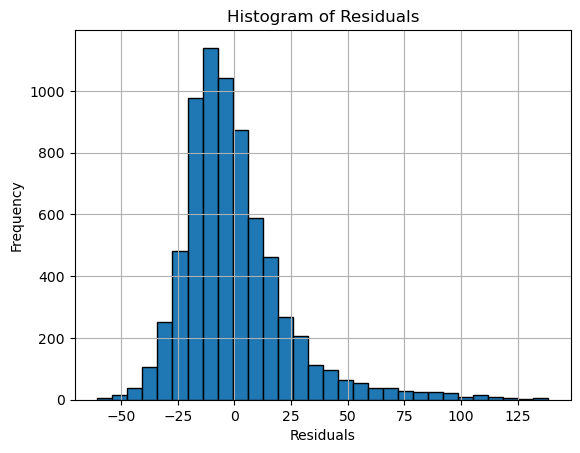

In [27]:
plt.hist(residuals, bins=30, edgecolor='black')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.grid(True)
plt.show()

### Quantile-Quantile (Q-Q) Plot

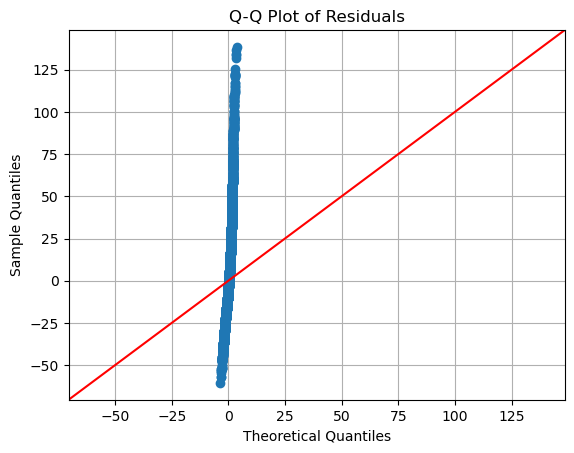

In [28]:
sm.qqplot(residuals, line ='45')
plt.title('Q-Q Plot of Residuals')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.grid(True)
plt.show()

### Statistical Tests

In [29]:
res = residuals.sample(30)
res

13033   -32.005524
8778     10.974289
4184     -7.331876
9373    -12.565258
6806    -10.817445
2541      3.700612
1077      2.310416
1971    -34.158758
595     -14.862246
848      95.902894
5899     30.892784
9005    -12.424354
4597     -0.434280
9350    -17.025711
1037    -16.956328
5572    -17.260115
6844    -15.094853
10350    -1.536228
3019     -3.287666
1282    -18.961548
2365    -15.865703
9848    -14.863725
9360     12.557988
6269    -12.543901
5379     -2.164835
5234     28.370795
5259      7.158197
9882     -8.014122
11101   -36.782220
4645     19.822412
dtype: float64

In [30]:

# Shapiro-Wilk test
shapiro_test_stat, shapiro_p_value = stats.shapiro(res)
print("Shapiro-Wilk Test - Test Statistic:", shapiro_test_stat, " p-value:", shapiro_p_value)

# Kolmogorov-Smirnov test
ks_test_stat, ks_p_value = stats.kstest(res, 'norm')

print("Kolmogorov-Smirnov Test - Test Statistic:", ks_test_stat, " p-value:", ks_p_value)

# Anderson-Darling test
anderson_test_stat, anderson_critical_values, anderson_significance_levels = stats.anderson(res)
print("Anderson-Darling Test - Test Statistic:", anderson_test_stat)
print("Anderson-Darling Test - Critical Values:", anderson_critical_values)

Shapiro-Wilk Test - Test Statistic: 0.8007676005363464  p-value: 6.770788604626432e-05
Kolmogorov-Smirnov Test - Test Statistic: 0.6181331658048677  p-value: 1.4264375497405086e-11
Anderson-Darling Test - Test Statistic: 1.5214221381769413
Anderson-Darling Test - Critical Values: [0.521 0.593 0.712 0.83  0.988]


### Interpret Results

##### Histogram and Q-Q Plot Observations:

Given the highly significant p-values obtained from both the Shapiro-Wilk (p < 0.0001) and Kolmogorov-Smirnov (p < 0.0001) tests, along with the Anderson-Darling test statistic (1.5214), it's likely that the histogram will show a more pronounced skewness, potentially indicating a departure from normality. Similarly, the Q-Q plot may exhibit more significant deviations from the straight line.
Statistical Test Results##### :

Shapiro-Wilk T
est: The extremely low p-value (6.77e-05) from the Shapiro-Wilk test strongly suggests a significant departure from normal##### ity.
Kolmogorov-Smirnov 
Test: The very low p-value (1.43e-11) from the Kolmogorov-Smirnov test also indicates a significant departure from norma##### lity.
Anderson-Darling
 Test: The test statistic (1.5214) exceeds the critical values at the 5% significance level, further supporting the conclusion of a departure from norm
##### ality.
Interpretation of Results:

The results provide strong evidence against the null hypothesis of normality. Both the Shapiro-Wilk and Kolmogorov-Smirnov tests reject the assumption of normality with very low p-values. The Anderson-Darling test statistic also supports this conclusion, indicating significant departures from normality.
The observed deviations in the histogram and Q-Q plot are likely to be more pronounced, reflecting the non-normal nature of the residuals.

### Report Findings

##### Findings: 
The analysis suggests a clear departure from normality in the distribution of residuals. This indicates that the regression model may not adequately capture the underlying data distribution.##### 
Limitations:
 Similar to the previous analysis, it's important to acknowledge potential limitations such as sample size, the assumption of independence of observations, and the subjective nature of visual inspection.